# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats 

sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

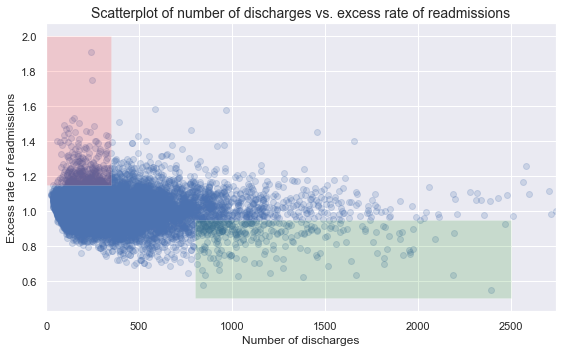

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

### Initial thought 

In the given dataset, there are multiple rows for same hospital/provider number. I strongly feel that whole analysis should be carried out after combining data for each hospital. To elaborate, each provider number should occur once in the dataset. The Predicted Readmission Rate and Expected Readmission Rate should be added for each provider number. And then Excess Readmission Ratio needs to be recalculated by dividing Predicted Readmission Rate with Expected Readmission Rate.

In the absence of above, the rest of the analysis will be flawed. 

Nevertheless, for this project as further cleaning is not required, I will work on the data as given.

Still I have mentioned the initial data wrangling steps that I would carry out if I am analyzing this data from scratch.

<b>Data Wrangling</b>

The given dataset has following issues that need to be fixed before we start working with the data:

1. There are 81 nan observations in Excess Readmissions column. We deleted them as they are small in number and should not affect our analysis.
2. There are some columns in data which are not needed for our analysis. So we deleted them.
3. There are multiple rows for same hospital/provider number. We combined the data to have a single row for each hospital. Provider number is the key. We summed each Predicted Readmission Rate and Expected Readmission Rate for each provider number. We then recalculated Excess Readmission Ratio by dividing Predicted Readmission Rate with Expected Readmission Rate.

In [6]:
# Helper Functions

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [7]:
df=clean_hospital_read_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [8]:
df.shape

(11578, 12)

In [9]:
np.sum(df['Excess Readmission Ratio'].isna())

81

In [10]:
df['Provider Number'].value_counts().head()

260081    5
260219    5
100291    5
100307    5
260077    5
Name: Provider Number, dtype: int64

In [11]:
# Delete rows with Nan Excess Readmission Ratio
df = df.dropna(subset=['Excess Readmission Ratio'])

In [12]:
# Drop unwanted columns

cols = [0,2,3,5,6,10,11]
df = df.drop(df.columns[cols],axis='columns',inplace = False).copy()

In [13]:
# Combine rows with same Provider Number
df = df.groupby('Provider Number',as_index = False).sum()
df['Provider Number'].value_counts().head()

260095    1
390201    1
370054    1
440159    1
30084     1
Name: Provider Number, dtype: int64

In [14]:
# Calculate Excess Readmission Ratio and add it as a new column
df['Excess Readmission Ratio'] = round(df['Predicted Readmission Rate']/df['Expected Readmission Rate'],4)

In [15]:
df.shape

(2993, 6)

In [16]:
df.head()

,Provider Number,Number of Discharges,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Excess Readmission Ratio
0,10001,3122,79.0,79.1,538.0,0.9987
1,10005,1592,64.3,66.5,270.0,0.9669
2,10006,2770,68.2,74.9,387.0,0.9105
3,10007,449,54.9,53.3,84.0,1.0300
4,10011,1860,75.3,77.9,269.0,0.9666


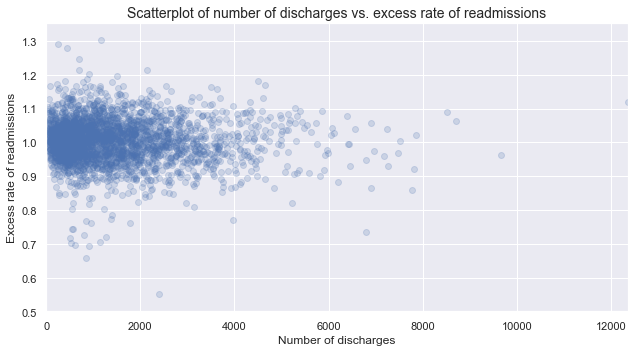

In [17]:
x = [a for a in df['Number of Discharges']]
y = list(df['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(x, y,alpha=0.2)

"""
ax.fill_between([0,1700], 1.15, 1.4, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([3500,212000], .5, .95, facecolor='green', alpha = .15, interpolate=True)
"""

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [18]:
# Compute Pearson correlation coefficient: r
r = pearson_r(df['Number of Discharges'],df['Excess Readmission Ratio'])

# Print the result
print(r)

-0.04946576117135951


# Working on the given data (without performing the data wrangling steps)

In [19]:
data = clean_hospital_read_df

# Drop rows with Nan values
data = data.dropna(subset=['Excess Readmission Ratio'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [21]:
data.mean()

Provider Number               257571.540141
Number of Discharges             365.466209
Footnote                                NaN
Excess Readmission Ratio           1.007504
Predicted Readmission Rate        17.984292
Expected Readmission Rate         17.865695
Number of Readmissions            63.633731
dtype: float64

## My comments on the given analysis and recommendations

### A. Do you agree with the above analysis and recommendations? Why or why not?
   

**A. Initial observations based on the given scatter plot above** - Overall, rate of readmissions is trending down with increasing number of discharges

From the plot, it is not evident that rate of readmissions is negatively correlated with number of discharges. So, we calculate pearson coefficient of correlation.

In [22]:
# Compute Pearson correlation coefficient: r
r = pearson_r(data['Number of Discharges'],data['Excess Readmission Ratio'])

# Print the result
print('r',r)

r -0.09739794351079353


The rate of readmission is weakly correlated with number of discharge as evident from a small negative value, so the given observation that rate of readmissions is trending down with increasing number of discharges holds true. But to confirm that the negative correlation coefficient is not a chance occurence, we should conduct a hypothesis test.

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 


In [23]:
data_low_dischg=data[data['Number of Discharges']<100]

In [24]:
data_low_dischg['Excess Readmission Ratio'].mean()

1.0226183501683506

In [25]:
np.sum(data_low_dischg['Excess Readmission Ratio']>1)/len(data_low_dischg)* 100

63.215488215488215

In [26]:
data_high_dischg=data[data['Number of Discharges']>1000]

In [27]:
data_high_dischg['Excess Readmission Ratio'].mean()

0.9783354211663071

In [28]:
np.sum(data_high_dischg['Excess Readmission Ratio']>1)/len(data_high_dischg)*100

44.49244060475162

The given statistical findings are verified by above calculations. But these numbers would be completely different if we carry out these calculations after wrangling the data as explained above.

The calculations with wrangled data are below:

In [29]:
d_l=df[df['Number of Discharges']<100]

In [30]:
d_l['Excess Readmission Ratio'].mean()

1.0182250000000004

In [31]:
np.sum(d_l['Excess Readmission Ratio']>1)/len(d_l)* 100

61.8421052631579

In [32]:
d_h=df[df['Number of Discharges']>1000]

In [33]:
d_h['Excess Readmission Ratio'].mean()

1.0021438481675395

In [34]:
np.sum(d_h['Excess Readmission Ratio']>1)/len(d_h)*100

52.22513089005235

On the basis of calculations on the wrangled data, we can modify the findings as follows:

+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.018 and 62% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 1.002 and 52% have excess readmission rate greater than 1 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.



### Null Hypothesis
There is no correlation between number of discharges and readmission rates.

### Alternate Hypothesis
There is significant correlation between number of discharges and readmission rates.

### 2. Compute and report the observed significance value (or p-value).


In [35]:
data.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [36]:
r_obs = pearson_r(data['Number of Discharges'],data['Excess Readmission Ratio'])
print('r_obs=',r_obs)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10)

# Draw replicates
for i in range(10):
    # Permute illiteracy measurments: illiteracy_permuted
    discharge_permuted = np.random.permutation(data['Number of Discharges'].copy())

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(discharge_permuted,data['Excess Readmission Ratio'])

# Compute p-value: p
p = np.sum(perm_replicates<=r_obs)/len(perm_replicates)
print('p-val =', p)

r_obs= -0.09739794351079353
p-val = 0.0


###    3. Report statistical significance for $\alpha$ = .01. 


For α  = .01, as p-value is less than α, we reject the null hypothesis and conclude that  number of discharges and readmission rates are negatively correlated.

In [37]:
stats.pearsonr(data['Number of Discharges'],data['Excess Readmission Ratio'])

(-0.09739794351079353, 1.222547377680967e-25)

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The hypothesis test conducted above shows that there is significant correlation between  number of discharges and readmission rates. However, practically speaking, as the value of r is close to zero, we cannot say that number of discharges and readmission rates are strongly correlated. It shows a weak correlation. So statistical significance is different from practical significance.

So practically speaking, as number of discharges and readmission rates seem to be weakly correlated, I would not recommend the client to take any actions as given in the recommendations above.

### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.


The scatter plot above does not clearly show the relationship between discharges and admission rates. Adding a regression line to the plot would be better.

C:\Users\sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


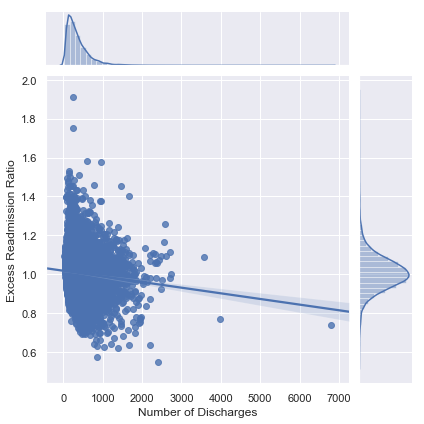

In [38]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=data,
              kind='reg')
plt.show()